In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [3]:
(cols, rows) = (2, 10)
colors = sns.color_palette(n_colors=100)

pd.set_option("display.max_rows", 150)
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None

rcParams["font.size"] = 14
rcParams["figure.figsize"] = 12, 8

In [4]:
df = pd.read_csv("s3://airflow-alphavantage-bucket/data/final/alphavantage.csv")
df.fillna(method="ffill", inplace=True)

In [5]:
df

,date,10yr_treasury_yield,2yr_treasury_yield,30yr_treasury_yield,5yr_treasury_yield,aapl_annual_eps,aapl_quarterly_eps,aapl_surprise,amzn_annual_eps,amzn_quarterly_eps,amzn_surprise,consumer_price_index,consumer_sentiment,federal_interest_rate,gdp_per_capita,googl_annual_eps,googl_quarterly_eps,googl_surprise,gross_domestic_product,inflation_expectation,inflation_rate,manufacturers_orders,msft_annual_eps,msft_quarterly_eps,msft_surprise,nonfarm_payroll,retail_sales,open,close,volume,tsla_annual_eps,tsla_quarterly_eps,tsla_surprise,unemployment,day,month,year
0,2002-01-01,5.07,3.07,5.48,4.38,0.09,0.0034,0.00,-0.44,-0.16,0.00,177.400,83.9,1.52,46400.0,NaN,NaN,NaN,NaN,0.4,2.826171,160265.0,0.87,0.22,0.02,128875.0,262004.0,116.150002,114.300003,14619500.0,NaN,NaN,NaN,5.5,Tuesday,January,2002
1,2002-01-01,5.07,3.07,5.48,4.38,0.09,0.0034,0.00,-0.44,-0.16,0.00,177.400,83.9,1.52,46400.0,NaN,NaN,NaN,NaN,0.4,2.826171,160265.0,0.87,0.22,0.02,128875.0,230546.0,116.150002,114.300003,14619500.0,NaN,NaN,NaN,5.5,Tuesday,January,2002
2,2002-01-01,5.07,3.07,5.48,4.38,0.09,0.0034,0.00,-0.44,-0.16,0.00,177.100,83.9,1.52,46400.0,NaN,NaN,NaN,NaN,0.4,2.826171,160265.0,0.87,0.22,0.02,128875.0,230546.0,116.150002,114.300003,14619500.0,NaN,NaN,NaN,5.5,Tuesday,January,2002
3,2002-01-01,5.07,3.07,5.48,4.38,0.09,0.0034,0.00,-0.44,-0.16,0.00,177.100,83.9,1.52,46400.0,NaN,NaN,NaN,NaN,0.4,2.826171,160265.0,0.87,0.22,0.02,128875.0,230546.0,116.150002,114.300003,14619500.0,NaN,NaN,NaN,5.7,Tuesday,January,2002
4,2002-01-01,5.07,3.07,5.48,4.38,0.09,0.0034,0.00,-0.44,-0.16,0.00,177.100,93.0,1.52,46400.0,NaN,NaN,NaN,NaN,0.4,2.826171,160265.0,0.87,0.22,0.02,128875.0,230546.0,116.150002,114.300003,14619500.0,NaN,NaN,NaN,5.7,Tuesday,January,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29286,2022-12-29,3.88,4.34,3.98,3.94,6.11,1.2900,0.02,3.25,0.28,0.06,297.711,58.6,4.33,60181.0,5.6,1.06,-0.19,5018.093,4.7,4.697859,259696.0,9.20,2.35,0.05,154990.0,611784.0,381.330000,376.660000,70911520.0,2.26,1.05,0.06,3.7,Thursday,December,2022
29287,2022-12-29,3.88,4.34,3.98,3.94,6.11,1.2900,0.02,3.25,0.28,0.06,297.711,58.6,4.33,60181.0,5.6,1.06,-0.19,5018.093,4.7,4.697859,259696.0,9.20,2.35,0.05,154990.0,611784.0,379.630000,383.440000,66970877.0,2.26,1.05,0.06,3.7,Thursday,December,2022
29288,2022-12-29,3.88,4.34,3.92,3.94,6.11,1.2900,0.02,3.25,0.28,0.06,297.711,58.6,4.33,60181.0,5.6,1.06,-0.19,5018.093,4.7,4.697859,259696.0,9.20,2.35,0.05,154990.0,611784.0,379.630000,383.440000,66970877.0,2.26,1.05,0.06,3.7,Thursday,December,2022
29289,2022-12-29,3.83,4.34,3.92,3.94,6.11,1.2900,0.02,3.25,0.28,0.06,297.711,58.6,4.33,60181.0,5.6,1.06,-0.19,5018.093,4.7,4.697859,259696.0,9.20,2.35,0.05,154990.0,611784.0,379.630000,383.440000,66970877.0,2.26,1.05,0.06,3.7,Thursday,December,2022


In [6]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["year"].astype(str)
df["month"] = df["month"].astype(str)
df = df[df["date"] >= "2020-01-01"]
df.drop_duplicates(inplace=True, keep="last", ignore_index=True)

In [7]:
economic_indicators = [
    "consumer_price_index",
    "consumer_sentiment",
    "federal_interest_rate",
    "gdp_per_capita",
    "gross_domestic_product",
    "inflation_expectation",
    "inflation_rate", 
    "manufacturers_orders",
    "nonfarm_payroll",
    "retail_sales",
    "unemployment"
]

In [8]:
economic_indicators_df = df[economic_indicators]
economic_indicators_df["date"] = df["date"]
economic_indicators_df.drop_duplicates(keep="last", inplace=True)
economic_indicators_df.reset_index(drop=True, inplace=True)
economic_indicators_df.tail(10)

,consumer_price_index,consumer_sentiment,federal_interest_rate,gdp_per_capita,gross_domestic_product,inflation_expectation,inflation_rate,manufacturers_orders,nonfarm_payroll,retail_sales,unemployment,date
1021,297.711,58.6,4.33,60181.0,5018.093,4.7,4.697859,259696.0,154990.0,611784.0,3.7,2022-12-19
1022,297.711,58.6,4.33,60181.0,5018.093,4.7,4.697859,259696.0,154990.0,611784.0,3.7,2022-12-20
1023,297.711,58.6,4.33,60181.0,5018.093,4.7,4.697859,259696.0,154990.0,611784.0,3.7,2022-12-21
1024,297.711,58.6,4.33,60181.0,5018.093,4.7,4.697859,259696.0,154990.0,611784.0,3.7,2022-12-22
1025,297.711,58.6,4.33,60181.0,5018.093,4.7,4.697859,259696.0,154990.0,611784.0,3.7,2022-12-23
1026,297.711,58.6,4.33,60181.0,5018.093,4.7,4.697859,259696.0,154990.0,611784.0,3.7,2022-12-26
1027,297.711,58.6,4.33,60181.0,5018.093,4.7,4.697859,259696.0,154990.0,611784.0,3.7,2022-12-27
1028,297.711,58.6,4.33,60181.0,5018.093,4.7,4.697859,259696.0,154990.0,611784.0,3.7,2022-12-28
1029,297.711,58.6,4.33,60181.0,5018.093,4.7,4.697859,259696.0,154990.0,611784.0,3.7,2022-12-29
1030,297.711,58.6,4.33,60181.0,5018.093,4.7,4.697859,259696.0,154990.0,611784.0,3.7,2022-12-30


In [9]:
market_factors = [
    "2yr_treasury_yield",
    "5yr_treasury_yield",
    "10yr_treasury_yield",
    "30yr_treasury_yield",
    "aapl_quarterly_eps",
    "amzn_quarterly_eps",
    "googl_quarterly_eps",
    "msft_quarterly_eps"
]

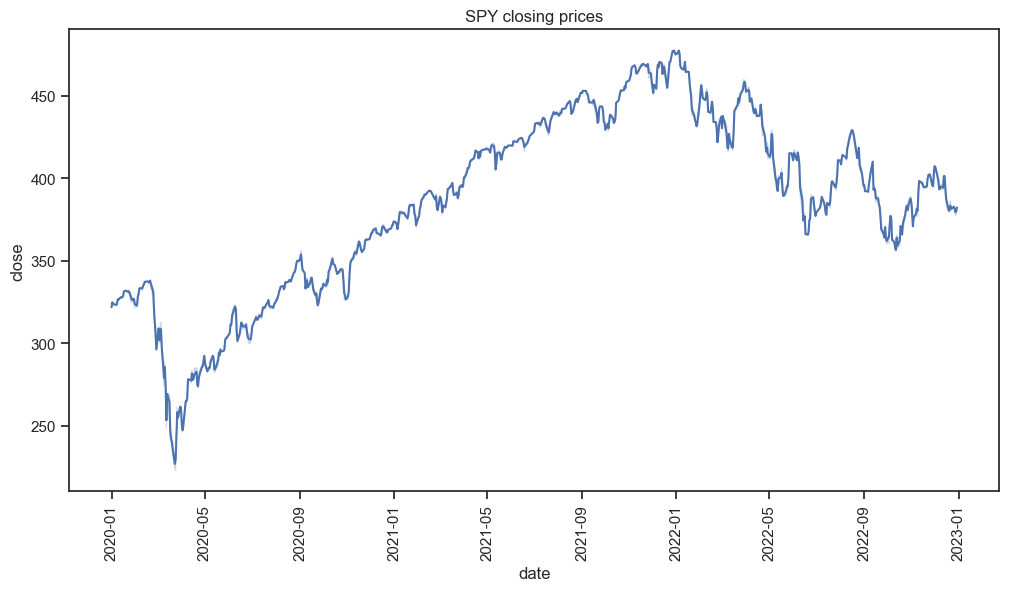

In [10]:
fig = plt.figure(figsize=(12, 6))

sns.set_theme(style="ticks")
ax = sns.lineplot(df, x="date", y="close")
ax.set(title="SPY closing prices")
plt.xticks(rotation=90)
plt.show()

In [11]:
scaler = MinMaxScaler()
scaler.fit(df[economic_indicators])
df[economic_indicators] = scaler.transform(df[economic_indicators])

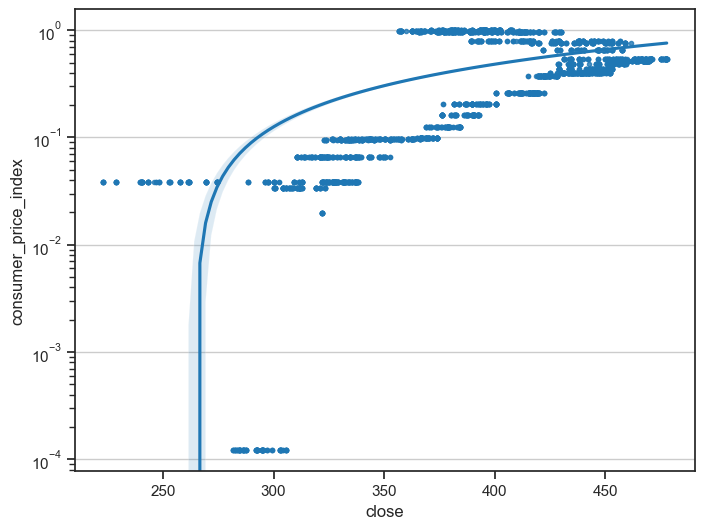

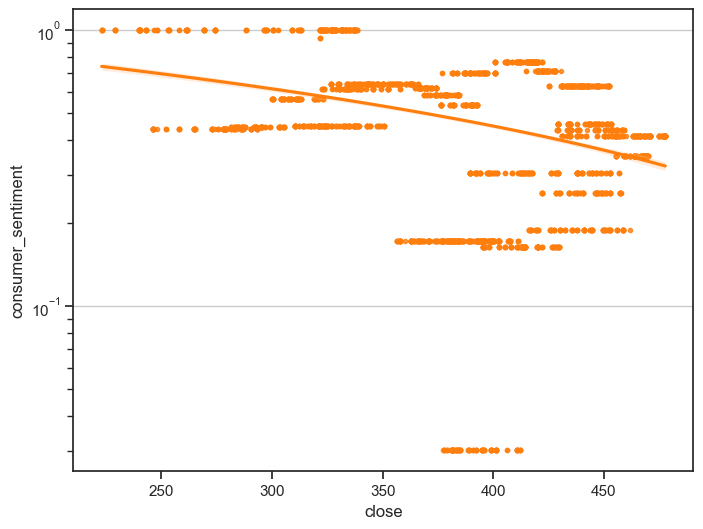

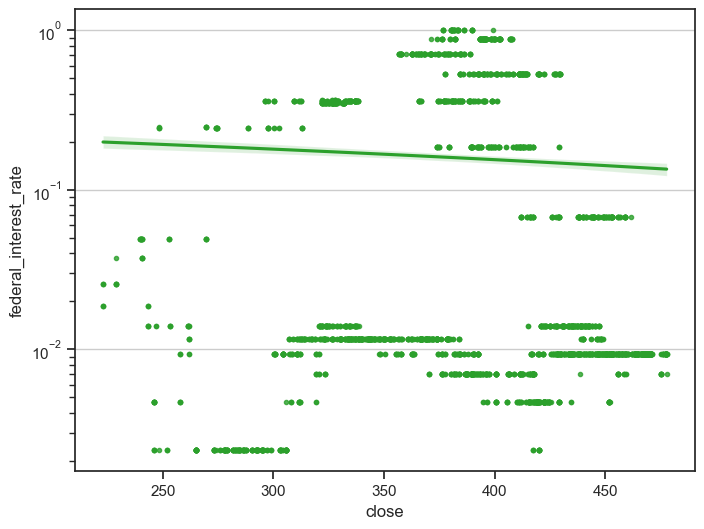

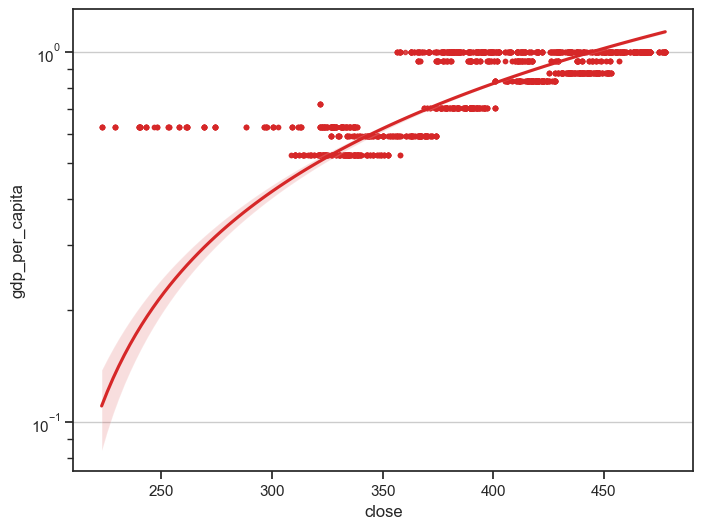

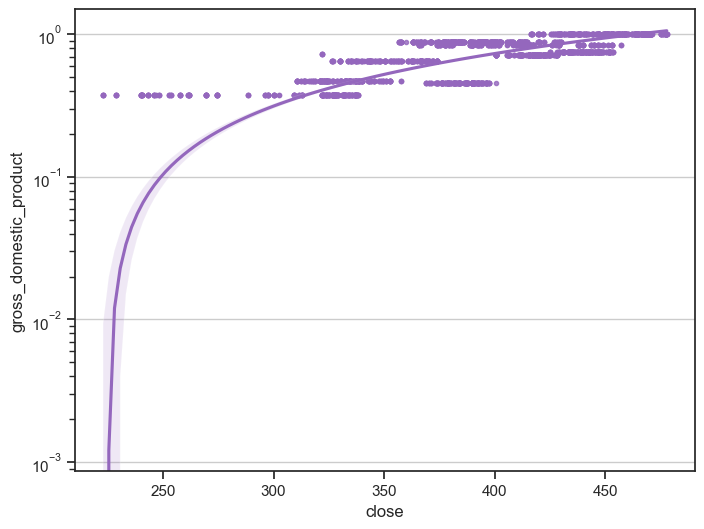

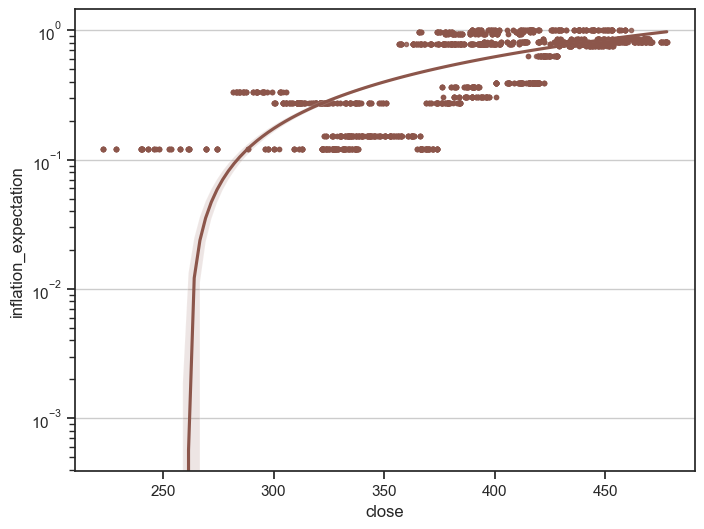

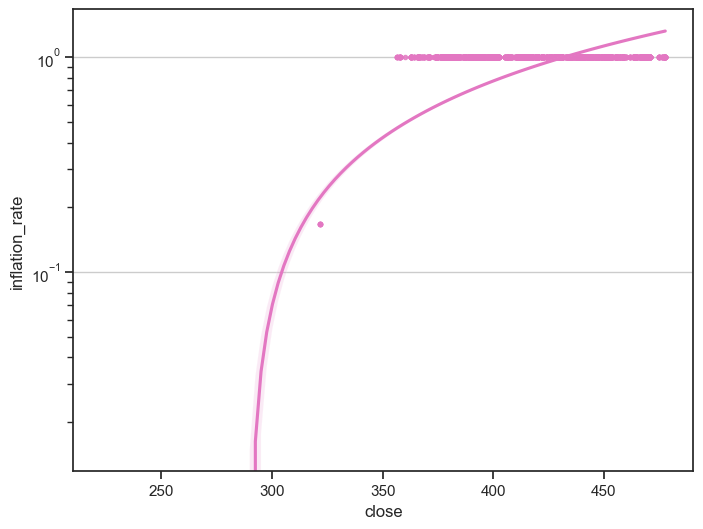

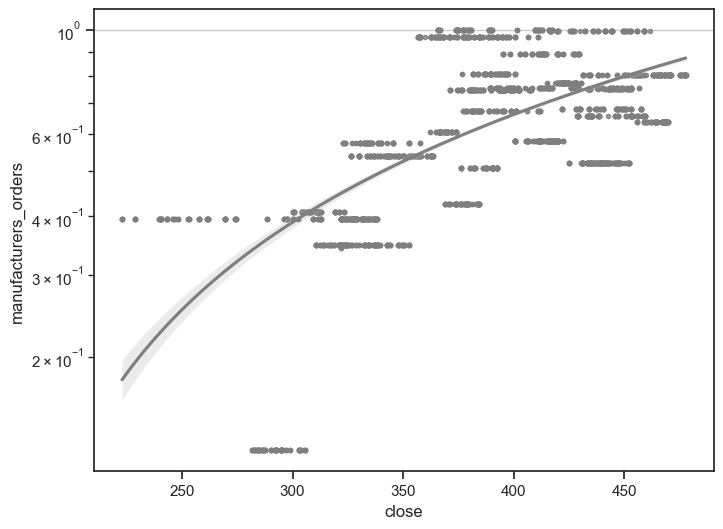

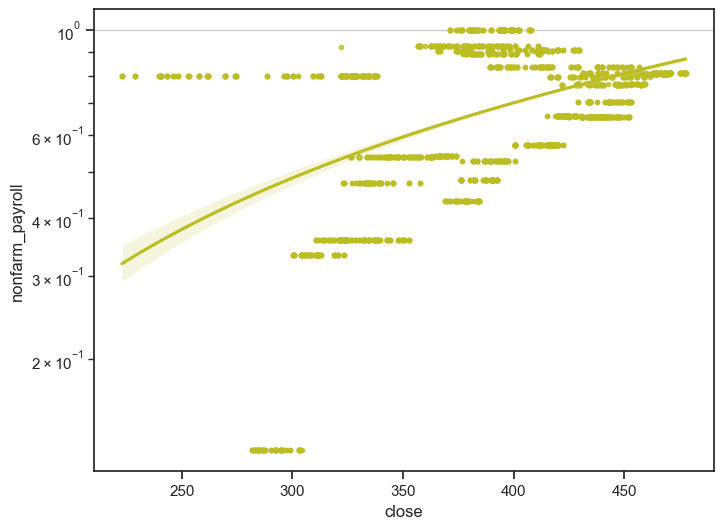

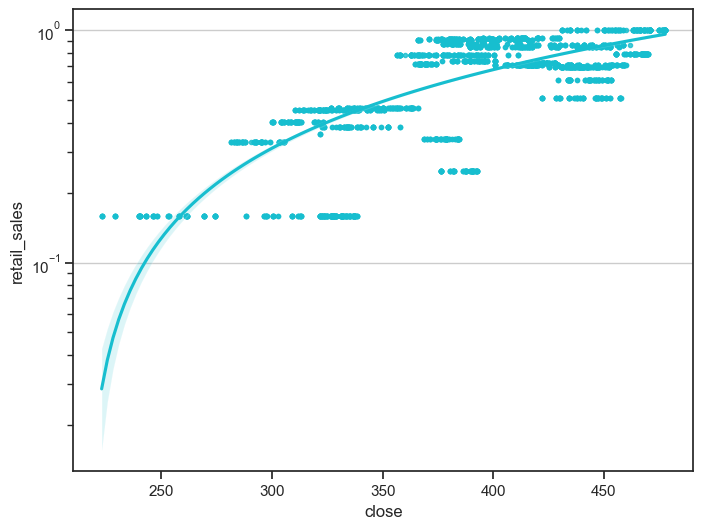

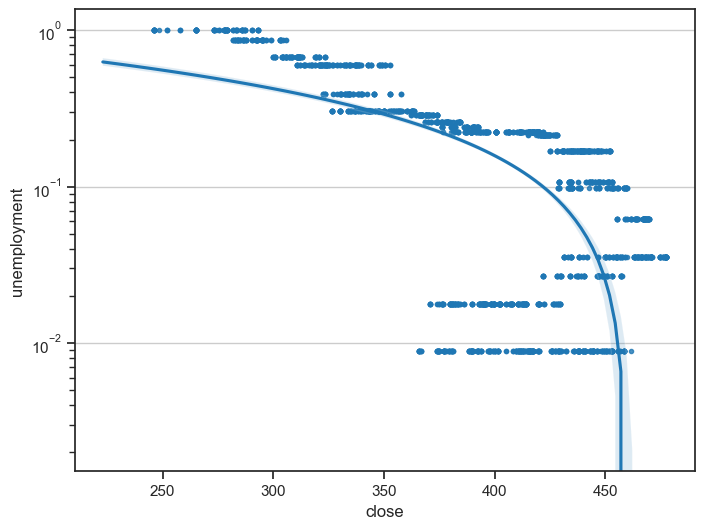

In [12]:
for key, value in enumerate(economic_indicators):
    fig = plt.figure(figsize=(8, 6))
    sns.set_theme(style="ticks")
    ax = sns.regplot(df, x="close", y=value, color=colors[key], marker=".")
    ax.set(yscale="log")
    ax.yaxis.grid(True)
    plt.show()

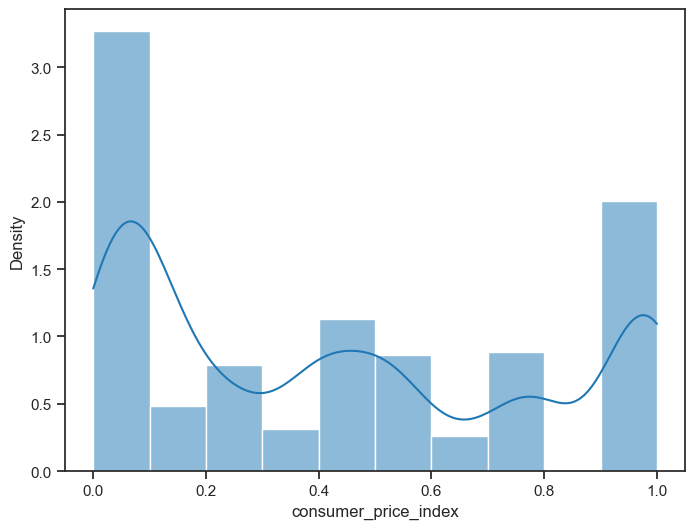

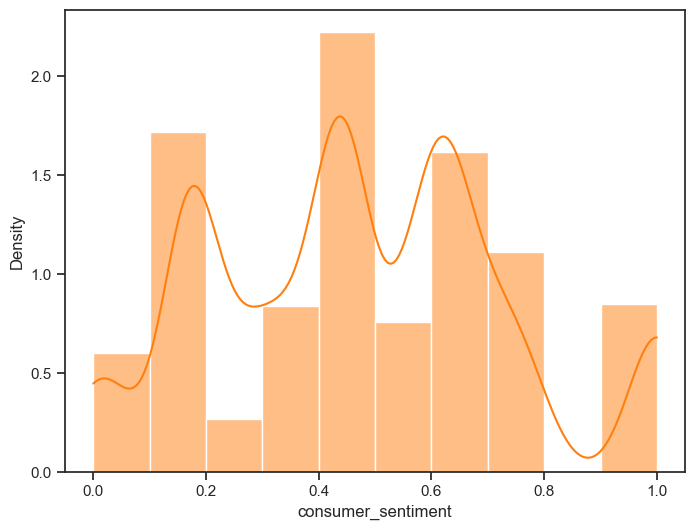

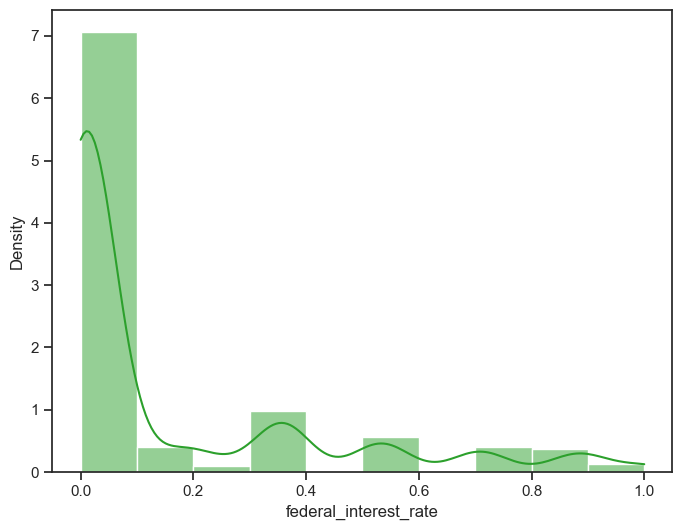

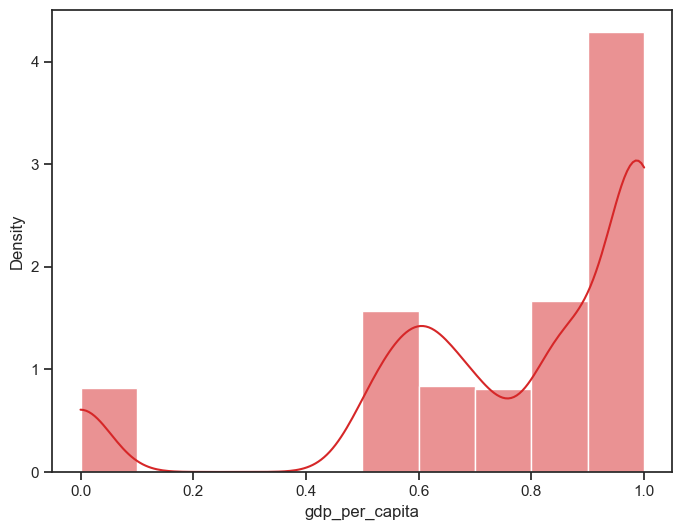

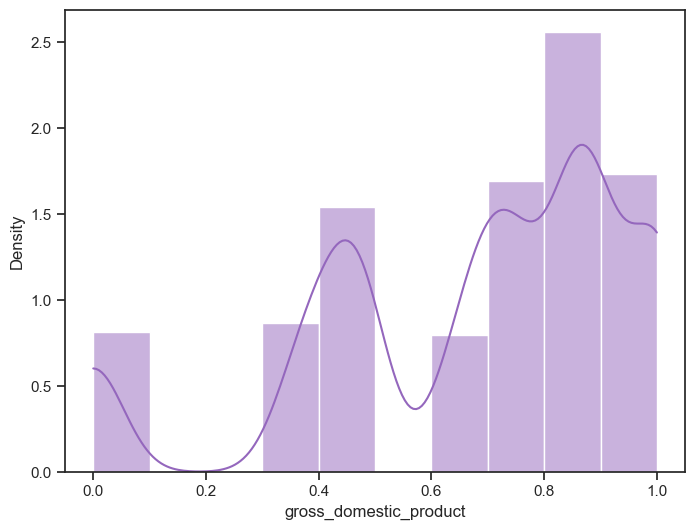

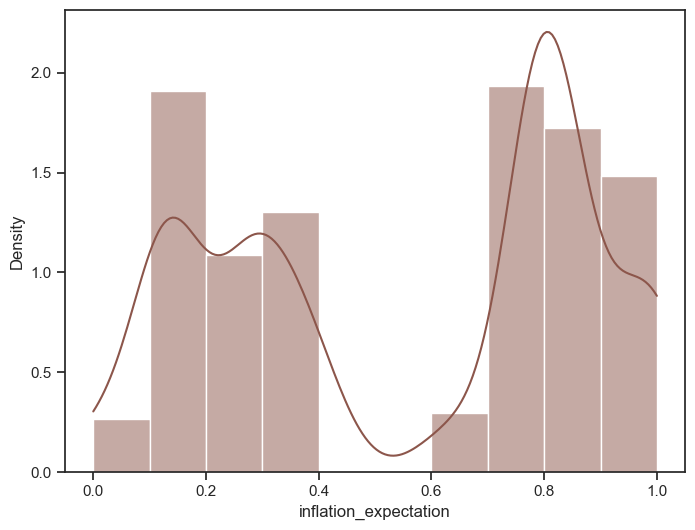

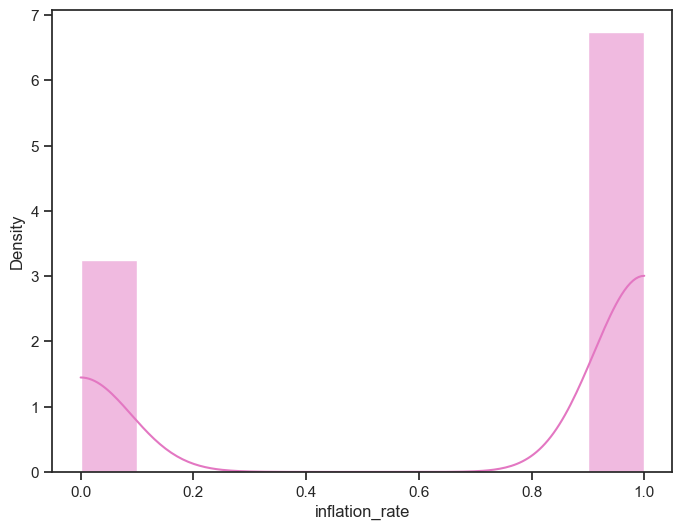

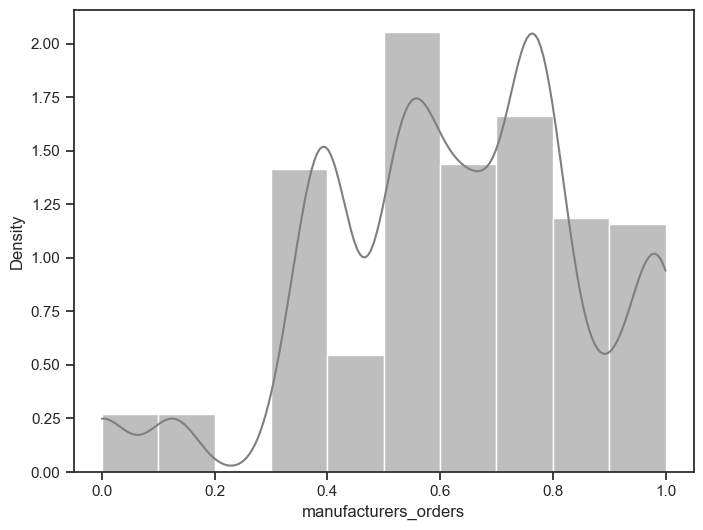

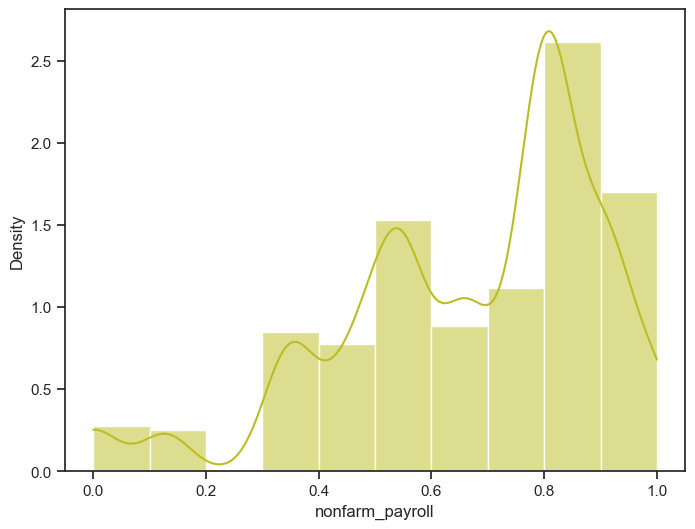

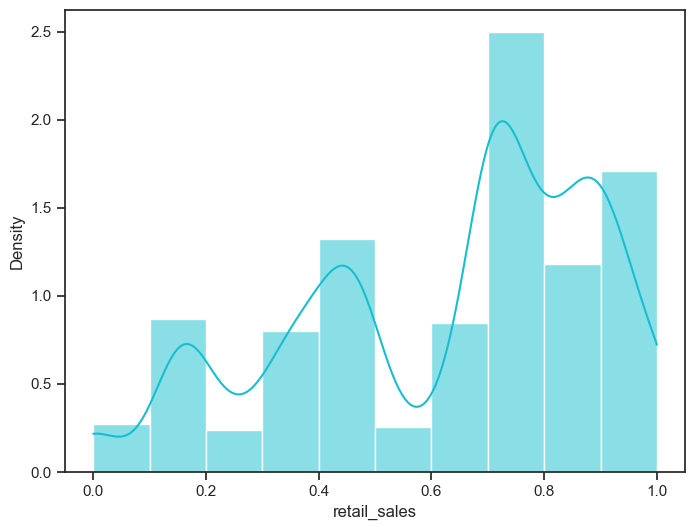

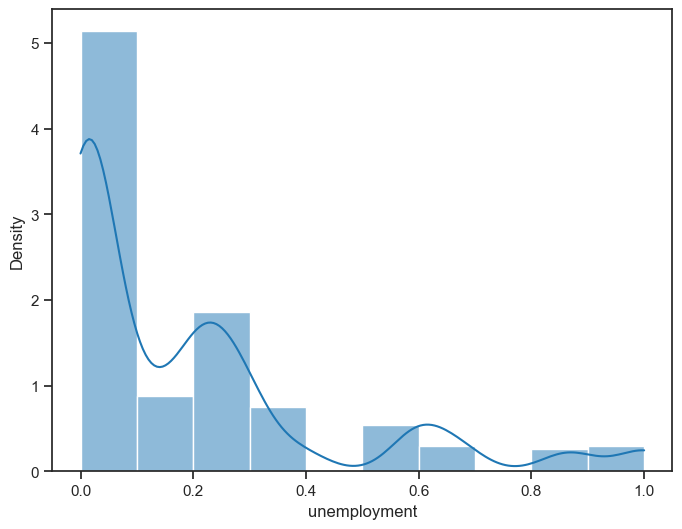

In [13]:
for key, value in enumerate(economic_indicators):
    fig = plt.figure(figsize=(8, 6))
    sns.set_theme(style="ticks")
    sns.histplot(df, x=value, bins=10, color=colors[key], kde=True, stat="density")
    plt.show()

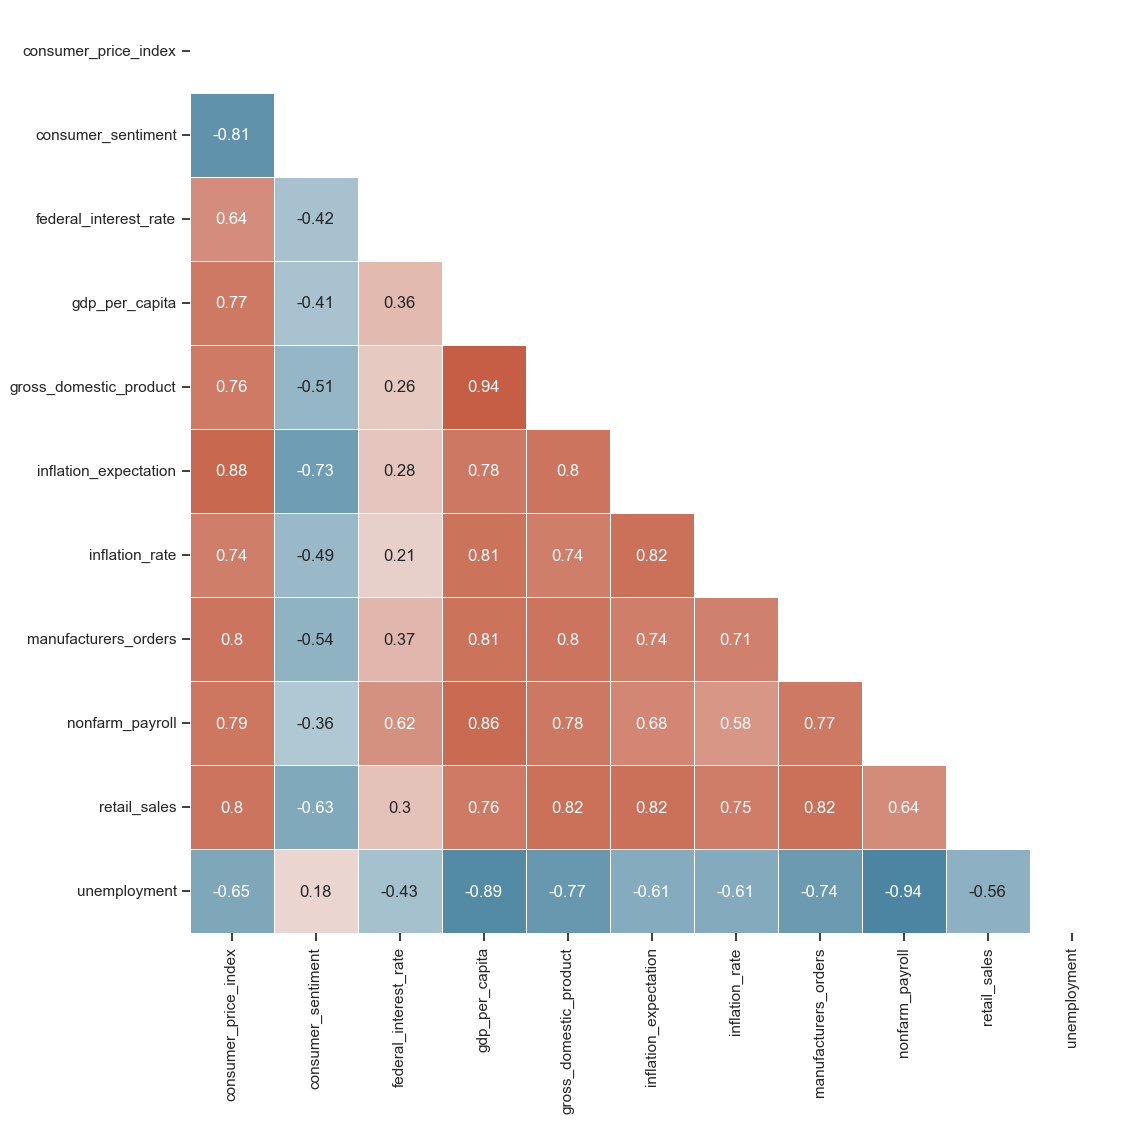

In [14]:
fig = plt.figure(figsize=(12, 12))

indicators_df = df[economic_indicators]
corr_matrix = indicators_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

ax = sns.heatmap(
    data=corr_matrix,
    mask=mask, 
    annot=True, 
    vmin=-1, 
    vmax=1, 
    center=0, 
    cmap=cmap,
    square=True, 
    linewidths=0.5,
    cbar=False
)
plt.show()

<Figure size 1200x1200 with 0 Axes>

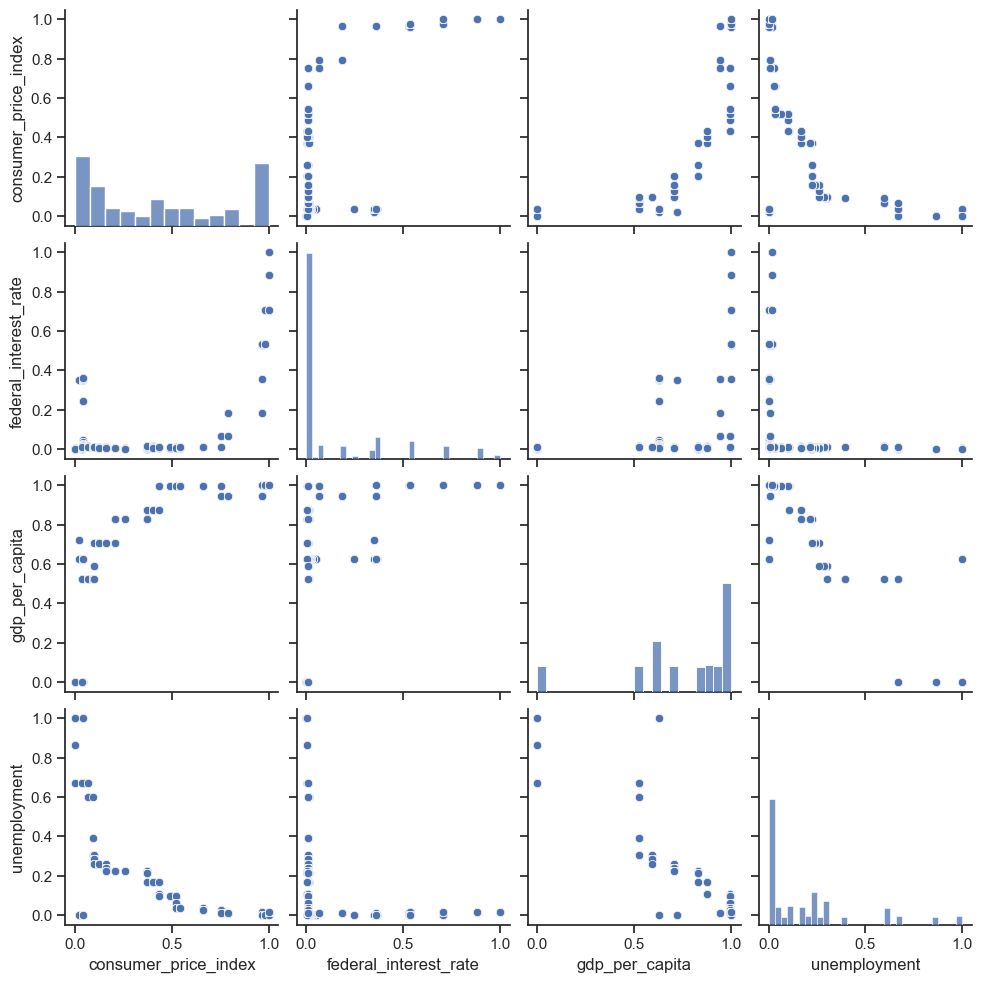

In [15]:
keep_columns = np.full(corr_matrix.shape[0], True)
for i in range(corr_matrix.shape[0] - 1):
    for j in range(i + 1, corr_matrix.shape[0] - 1):
        if (np.abs(corr_matrix.iloc[i, j]) >= 0.8):
            keep_columns[j] = False
selected_columns = df[economic_indicators].columns[keep_columns]
df_reduced = df[selected_columns]

fig = plt.figure(figsize=(12, 12))

sns.pairplot(df_reduced)
plt.show()

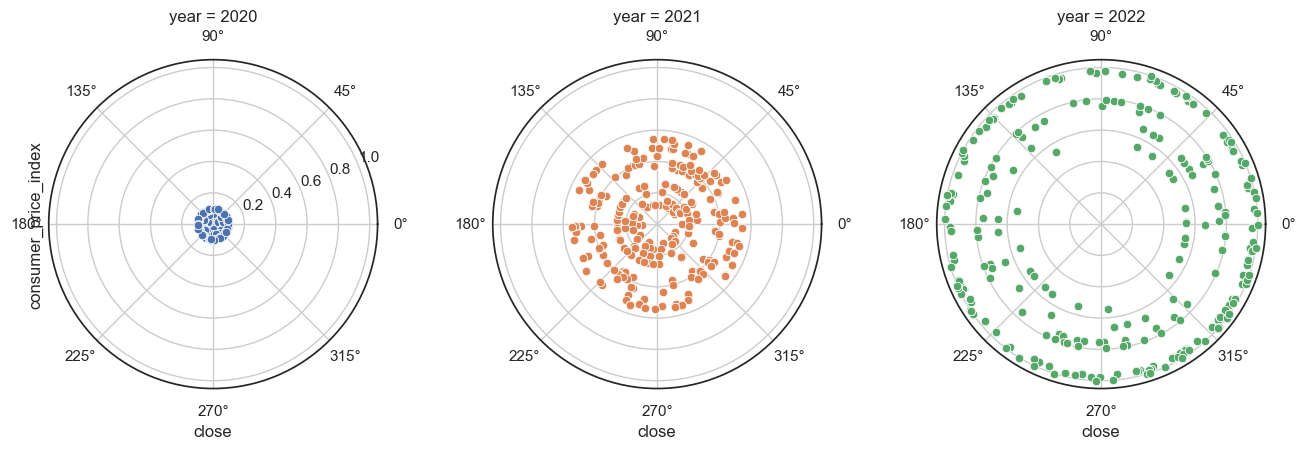

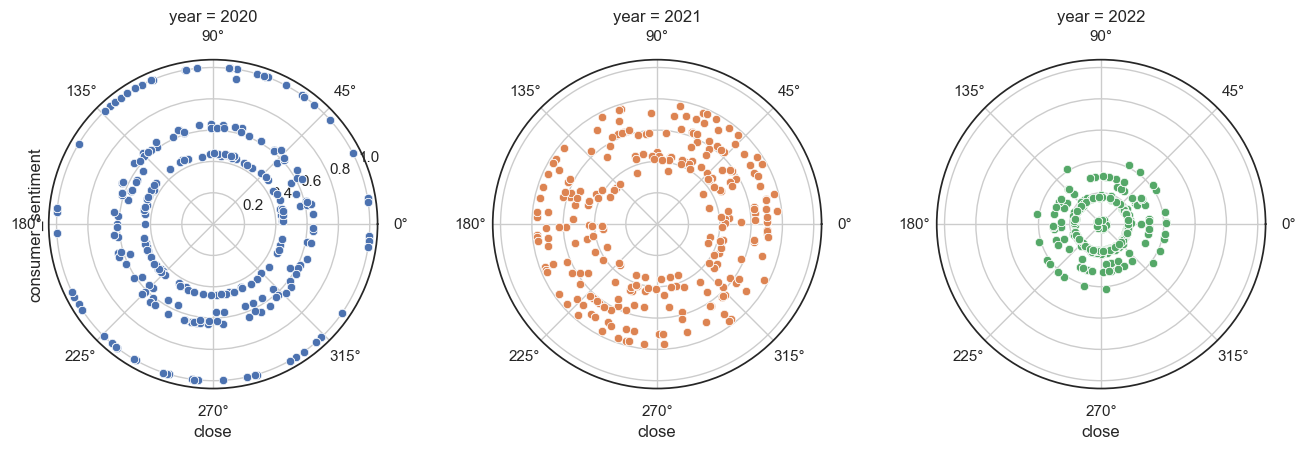

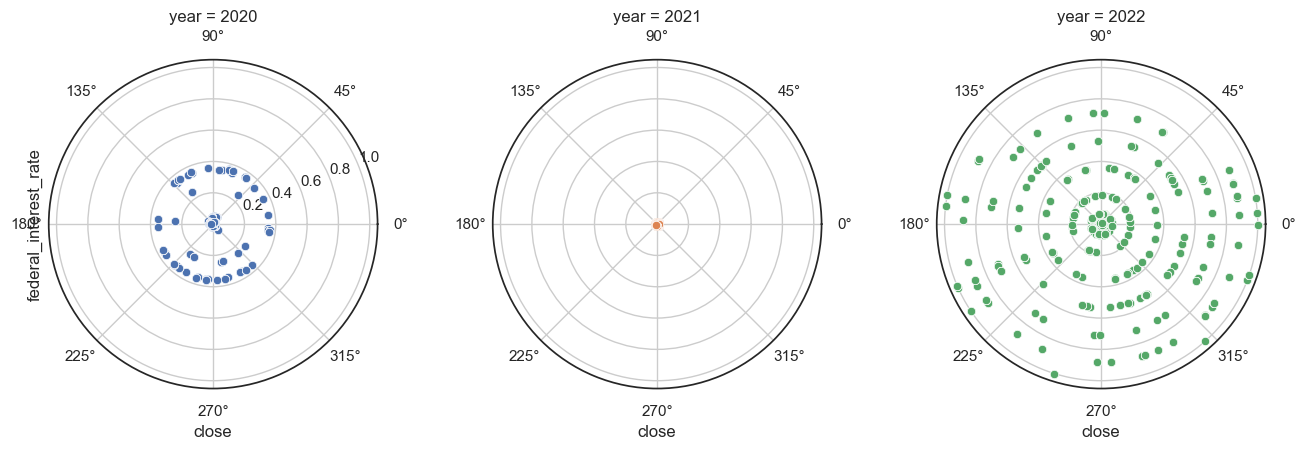

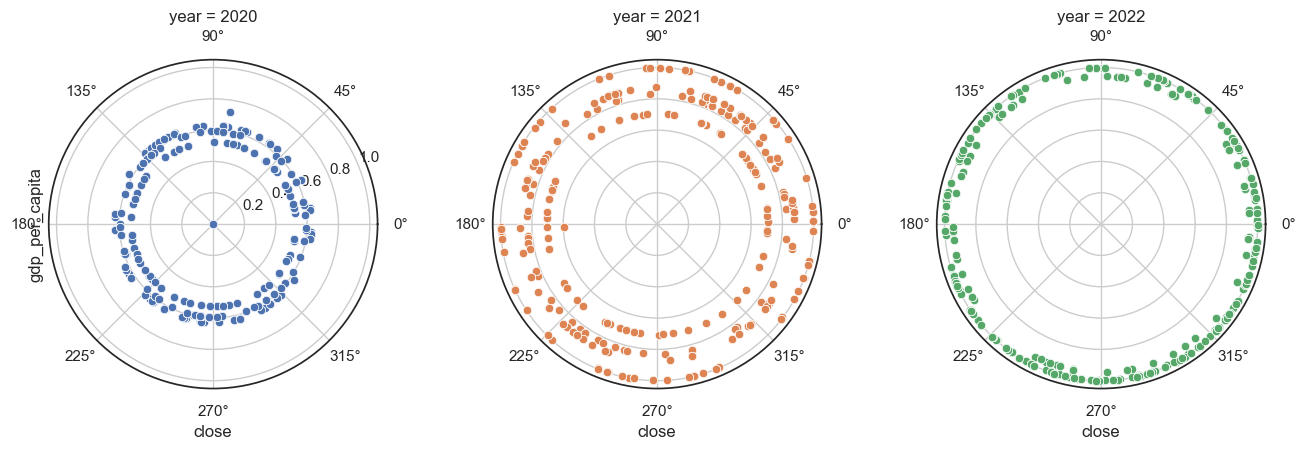

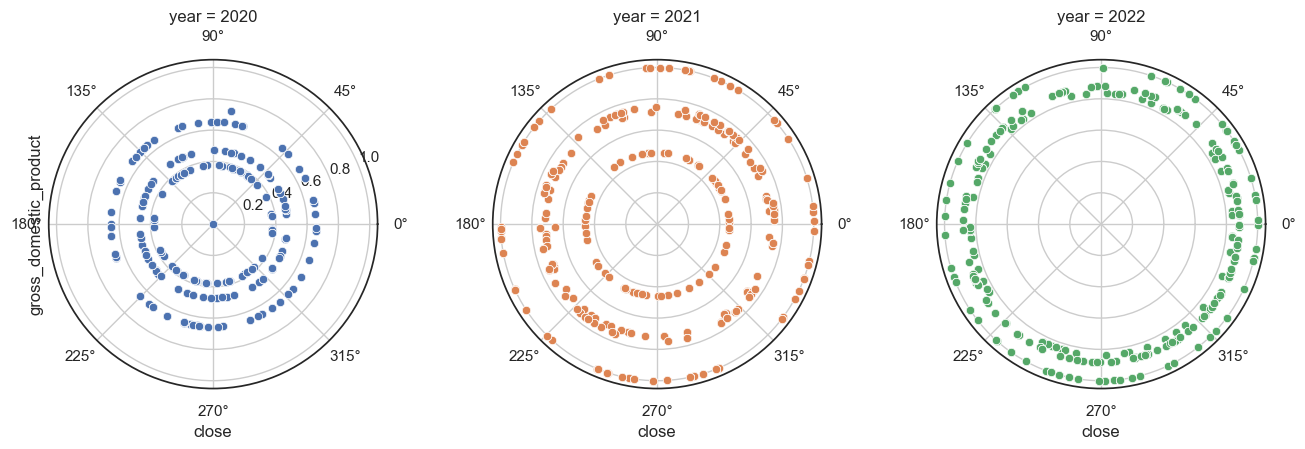

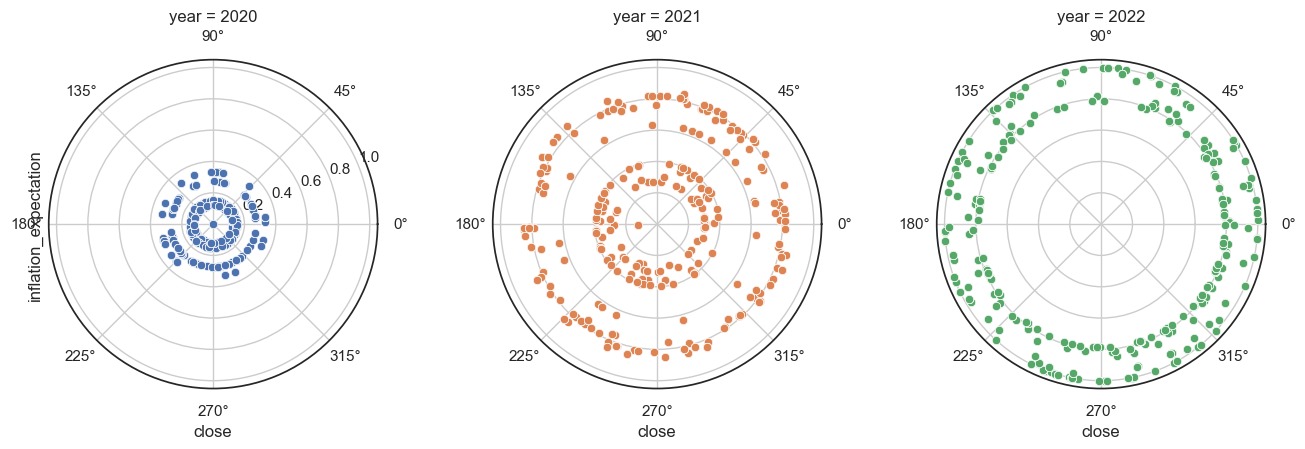

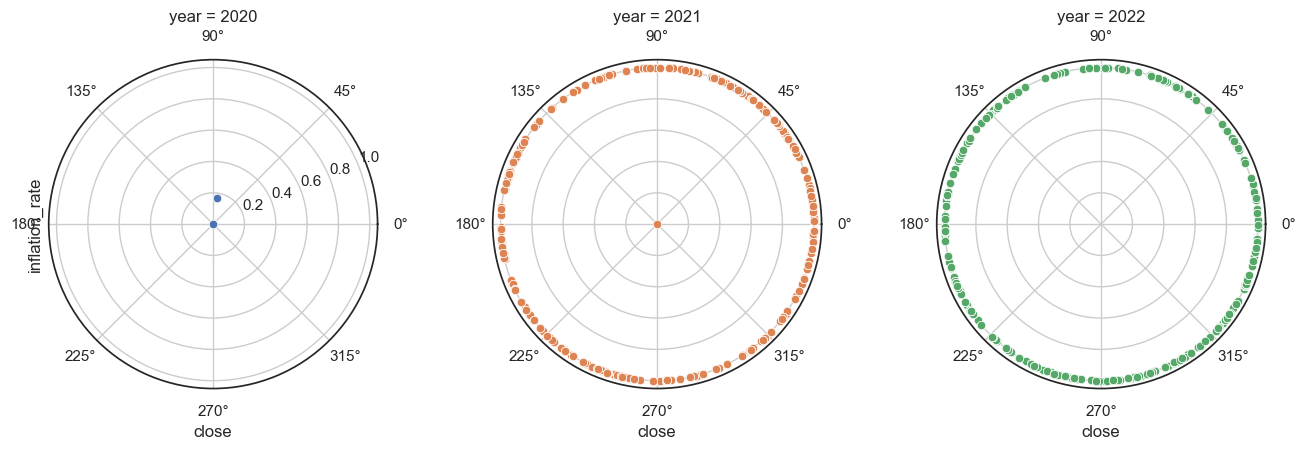

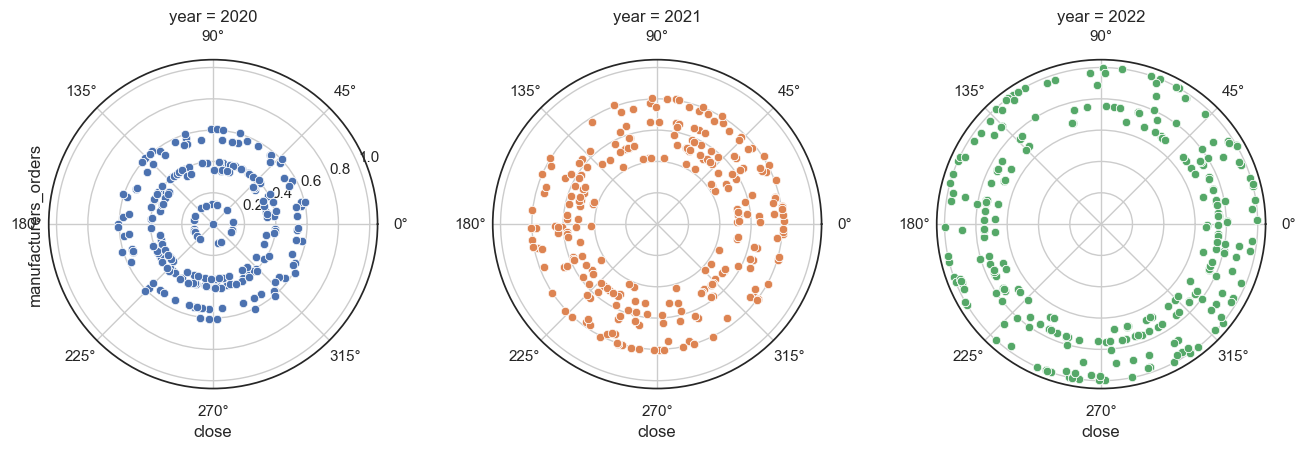

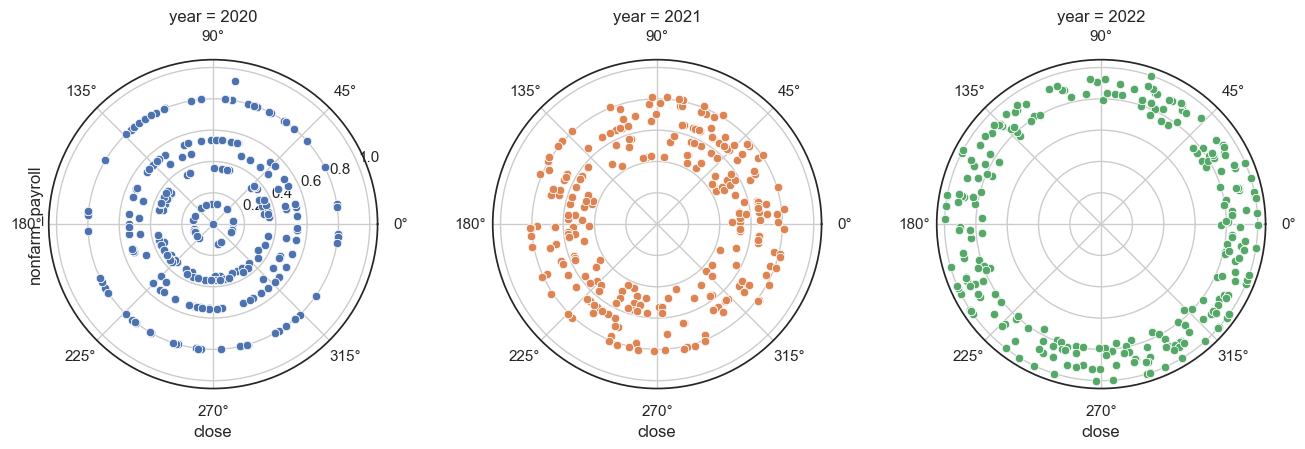

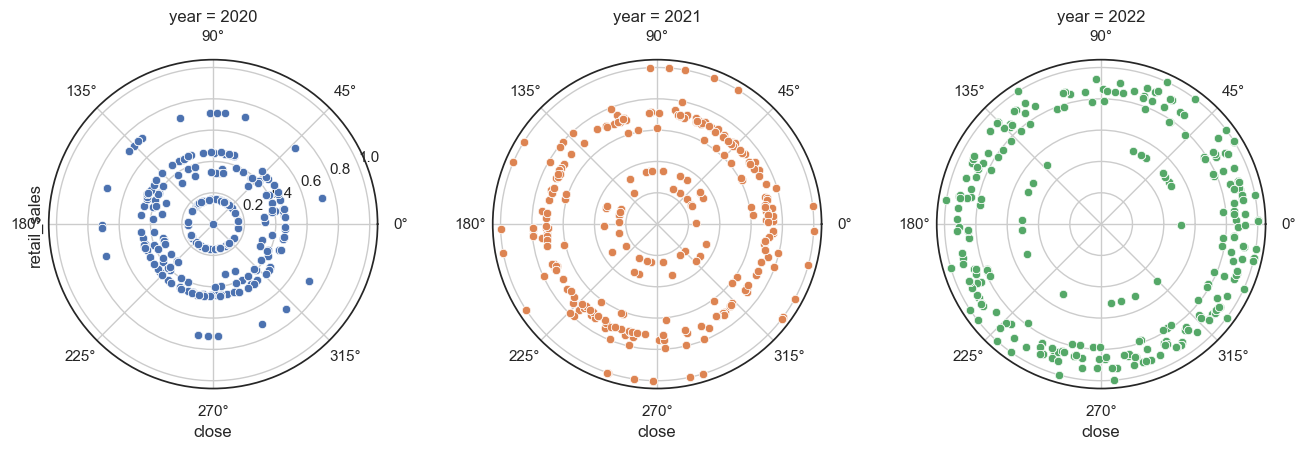

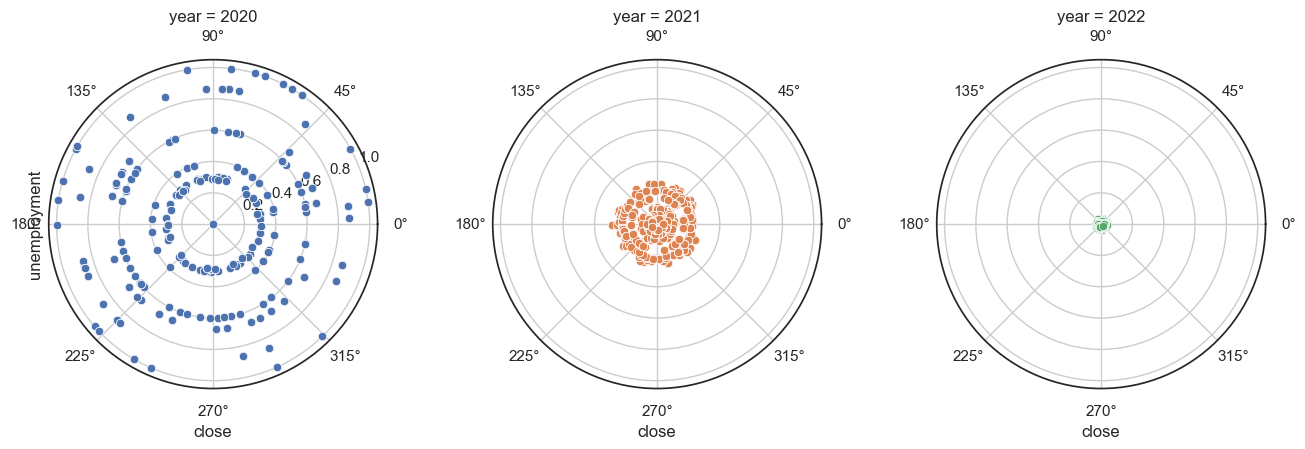

In [16]:
for key, value in enumerate(economic_indicators):
    sns.set_theme(style="ticks")
    g = sns.FacetGrid(
        data=df, 
        col="year", 
        hue="year", 
        subplot_kws=dict(projection="polar"), 
        height=4.5, 
        despine=False
    )
    g.map(sns.scatterplot, "close", value)
    plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

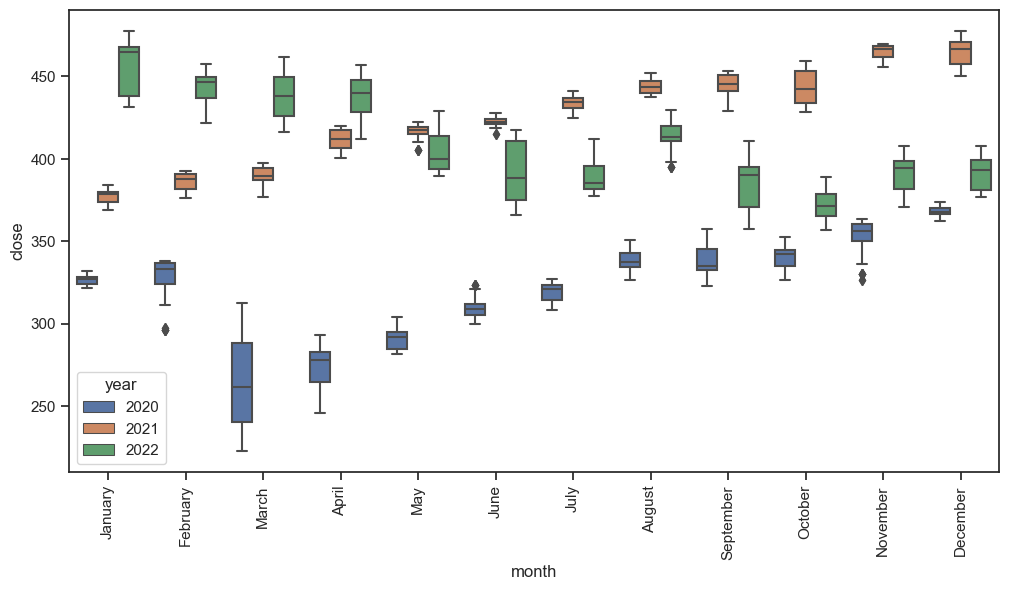

In [17]:
fig = plt.figure(figsize=(12, 6))

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.set_theme(style="ticks")
sns.boxplot(df, x="month", y="close", hue="year")
plt.xticks(rotation=90)
plt.show()

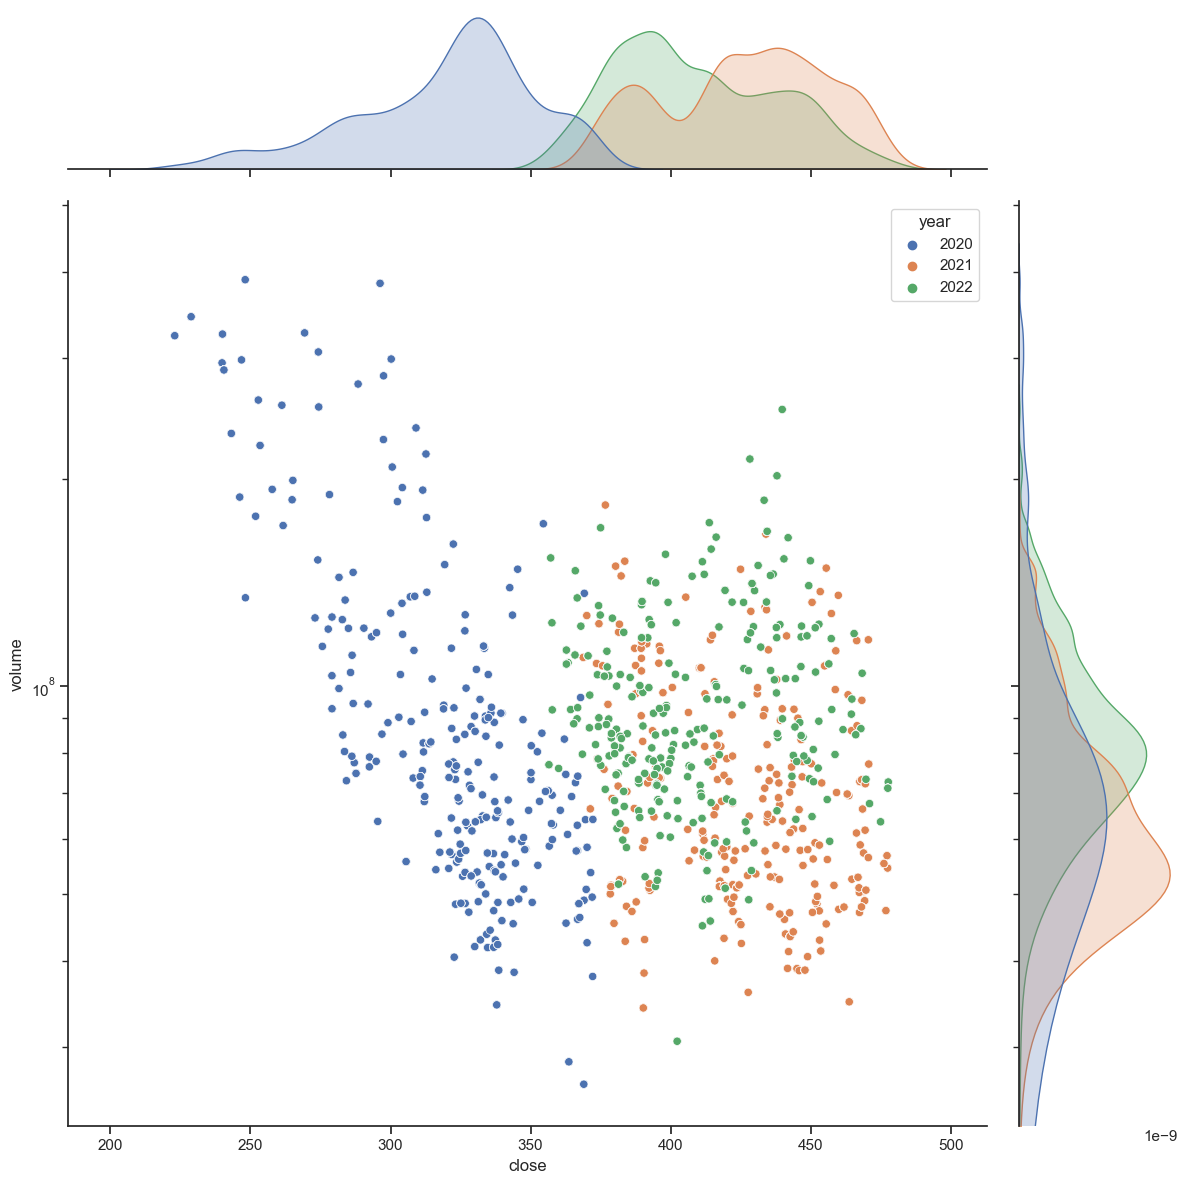

In [18]:
ax = sns.jointplot(data=df, x="close", y="volume", hue="year", height=12)
ax.ax_joint.set_yscale("log")
plt.show()